# 11주 2강: Machine Learning Basics 2


# Decision Tree
**의사결정나무(decision tree)**는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있기 때문에 **CART(Classification And Regression Tree)**라고도 함.

# Information Entropy
정보엔트로피

$Y=0$ 또는 $Y=1$ 인 두 가지 값을 가지는 확률변수의 확률분포가 다음과 같이 세 종류있다고 가정.

* 확률분포 $Y_1$ : $P(Y=0)=0.5$, $P(Y=1)=0.5$
* 확률분포 $Y_2$ : $P(Y=0)=0.8$, $P(Y=1)=0.2$
* 확률분포 $Y_3$ : $P(Y=0)=1.0$, $P(Y=1)=0.0$

In [7]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

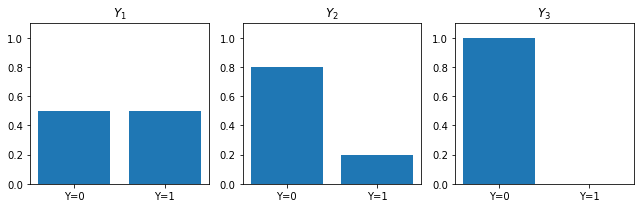

In [8]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar([0, 1], [0.5, 0.5])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_1$")
plt.subplot(132)
plt.bar([0, 1], [0.8, 0.2])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_2$")
plt.subplot(133)
plt.bar([0, 1], [1.0, 0.0])
plt.xticks([0, 1], ["Y=0", "Y=1"])
plt.ylim(0, 1.1)
plt.title("$Y_3$")
plt.tight_layout()
plt.show()

베이지안 관점에서 위 확률분포는 다음과 같은 정보를 나타냄

* 확률분포 $Y_1$은 $y$값에 대해 아무것도 모르는 상태
* 확률분포 $Y_2$은 $y$값이 0이라고 믿지만 아닐 가능성도 있다는 것을 아는 상태
* 확률분포 $Y_3$은 $y$값이 0이라고 100% 확신하는 상태

엔트로피 : 확률분포가 가지는 이러한 차이를 하나의 숫자로 나타낸 것

## Definition of Information Entropy
**엔트로피(entropy)**는 확률분포가 가지는 정보의 확신도 혹은 정보량을 수치로 표현한 것. 확률분포에서 특정한 값이 나올 확률이 높아지고 나머지 값의 확률은 낮아진다면 엔트로피가 작아짐. 빈대로 여러가지 값이 나올 확률이 대부분 비슷한 경우에는 엔트로피가 높아짐. 엔트로피는 확률분포의 모양이 어떤지를 나타내는 특성값 중 하나로 볼 수도 있음. 확률 또는 확률밀도가 특정값에 몰려있으면 엔트로피가 작다고 하고 반대로 여러가지 값에 골고루 퍼져 있다면 엔트로피가 크다고 합함. 


수학적으로 정보 엔트로피는 확률분포함수를 입력으로 받아 숫자를 출력하는 범함수(functional)로 정의. $H[]$기호로 표기.

확률변수 $Y$가 카테고리분포와 같은 이산확률변수이면 다음처럼 정의.

$$
\begin{align}
H[Y] = -\sum_{k=1}^K p(y_k) \log_2 p(y_k)
\tag{10.1.1}
\end{align}
$$

이 식에서 $K$는 $X$가 가질 수 있는 클래스의 수이고 $p(y)$는 확률질량함수. 확률은 무조건 1보다 작음. 그래서 로그값이 항상 음수이므로 음수 기호를 붙여서 양수로 만들었음

확률변수 $Y$가 정규분포와 같은 연속확률변수이면 다음처럼 정의.

$$
\begin{align}
H[Y] = -\int_{-\infty}^{\infty} p(y) \log_2 p(y) \; dy
\tag{10.1.2}
\end{align}
$$

이 식에서 $p(y)$는 확률밀도함수.

엔트로피 계산에서 $p(y)=0$인 경우에는 로그값이 정의되지 않으므로 다음과 같은 극한값을 보통 사용. 

$$
\begin{align}
\lim_{p\rightarrow 0} \; p\log_2{p} = 0
\tag{10.1.3}
\end{align}
$$

이 값은 로피탈의 정리(l'Hôpital's rule)에서 구할 수 있음.

위에서 예를 든 $Y_1$, $Y_2$, $Y_3$ 3 개의 이산확률분포에 대해 엔트로피를 구하면 다음과 같음.

$$
\begin{align}
H[Y_1] = -\dfrac{1}{2} \log_2 \dfrac{1}{2} -\dfrac{1}{2} \log_2 \dfrac{1}{2} = 1
\tag{10.1.4}
\end{align}
$$

$$
\begin{align}
H[Y_2] = -\dfrac{8}{10} \log_2 \dfrac{8}{10} -\dfrac{2}{10} \log_2 \dfrac{2}{10} \approx 0.72
\tag{10.1.5}
\end{align}
$$

$$
\begin{align}
H[Y_3] = -1 \log_2 1 -0 \log_2 0 = 0
\tag{10.1.6}
\end{align}
$$

## Classification using decision tree
의사결정나무를 이용한 분류법

1. 분류 규칙 : 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)을 정함.
2. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 1)과 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 2)으로 나눔
3. 각각의 자식 노드에 대해 1~2의 단계를 반복하여 하위의 자식 노드를 만듦. 단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지

이렇게 자식 노드 나누기를 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있음

의사결정나무에 전체 트레이닝 데이터를 모두 적용해 보면 각 데이터는 특정한 노드를 타고 내려가게 됩니다. 각 노드는 그 노드를 선택한 데이터 집합을 가집니다다. 이 때 노드에 속한 데이터의 클래스의 비율을 구하여 이를 그 노드의 조건부 확률 분포 $P(Y=k|X)_{\text{node}}$라고 정의합니다.

$$ P(Y=k|X)_{\text{node}} \approx \dfrac{N_{\text{node},k}}{N_{\text{node}}} $$

테스트 데이터 $X_{\text{test}}$의 클래스를 예측할 때는 가장 상위의 노드부터 분류 규칙을 차례대로 적용하여 마지막에 도달하는 노드의 조건부 확률 분포를 이용하여 클래스를 예측합니다.

$$ \hat{Y} = \text{arg}\max_k P(Y=k|X_{\text{test}})_{\text{last node}} $$

### The way to set the rule

분류 규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립 변수와 기준값을 찾는 것. 이러한 기준을 정량화한 것이 정보획득량(information gain). 기본적으로 모든 독립 변수와 모든 가능한 기준값에 대해 정보획득량을 구하여 가장 정보획득량이 큰 독립 변수와 기준값을 선택.

### Information gain

정보획득량(information gain) : $X$라는 조건에 의해 확률 변수 $Y$의 엔트로피가 얼마나 감소하였는가를 나타내는 값. 다음처럼 $Y$의 엔트로피에서 $X$에 대한 $Y$의 조건부 엔트로피를 뺀 값으로 정의. 

$$ IG[Y,X] = H[Y] - H[Y|X] $$ 

### Scikit-Learn의 의사결정나무 클래스

Scikit-Learn에서 의사결정나무는 `DecisionTreeClassifier` 클래스로 구현. 여기에서는 붓꽃(Iris)분류 문제를 예를 들어 의사결정나무를 설명. 이 예제에서는 독립변수 공간을 공간상에 표시하기 위해 꽃의 길이와 폭만을 독립변수로 사용.

In [9]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

의사결정나무를 시각화하기 위한 코드. `draw_decision_tree` 함수는 의사결정나무의 의사 결정 과정의 세부적인 내역을 다이어그램으로 보여주고  `plot_decision_regions` 함수는 이러한 의사 결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화하여 보여줌.

In [10]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [11]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

In [14]:
draw_decision_tree(tree1)

FileNotFoundError: [Errno 2] "dot" not found in path.

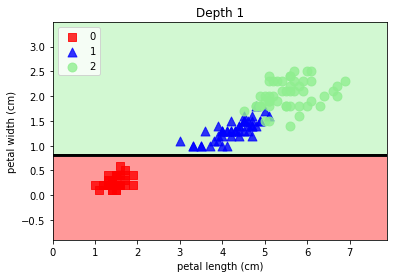

In [15]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [17]:
tree2 = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, random_state=0).fit(X, y)

In [18]:
draw_decision_tree(tree2)

FileNotFoundError: [Errno 2] "dot" not found in path.

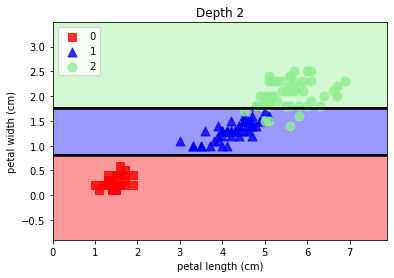

In [19]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [20]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [21]:
tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

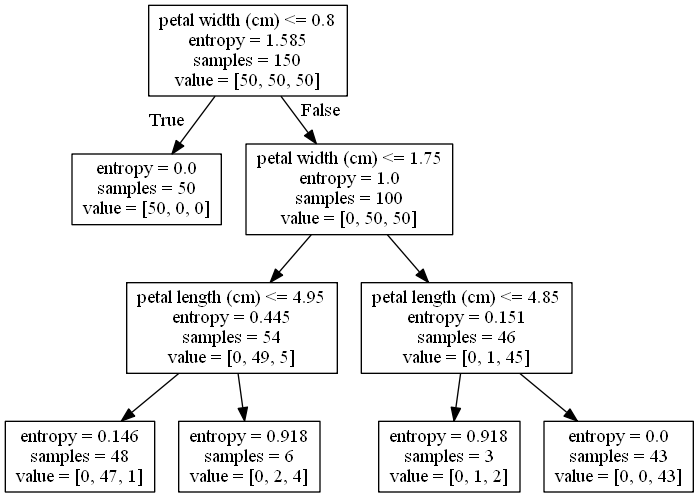

In [16]:
draw_decision_tree(tree3)

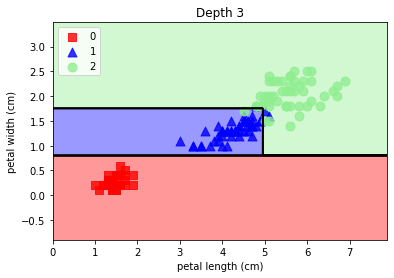

In [22]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [23]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [24]:
tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)

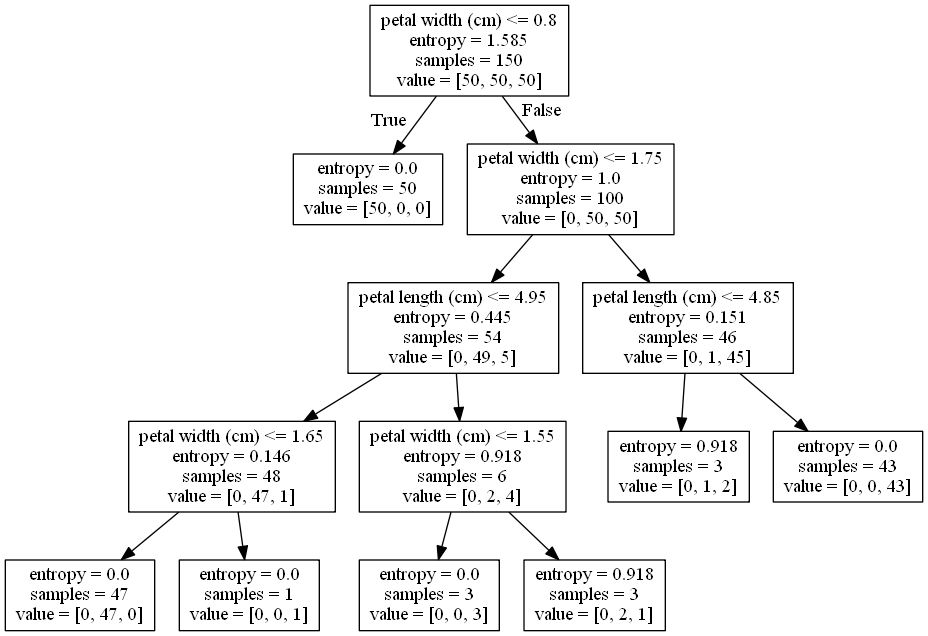

In [20]:
draw_decision_tree(tree4)

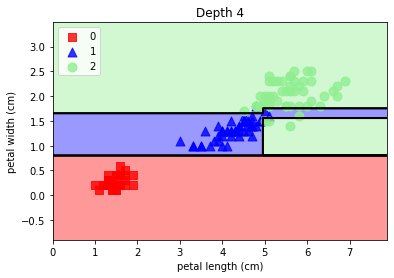

In [25]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [26]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [27]:
tree5 = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=0).fit(X, y)

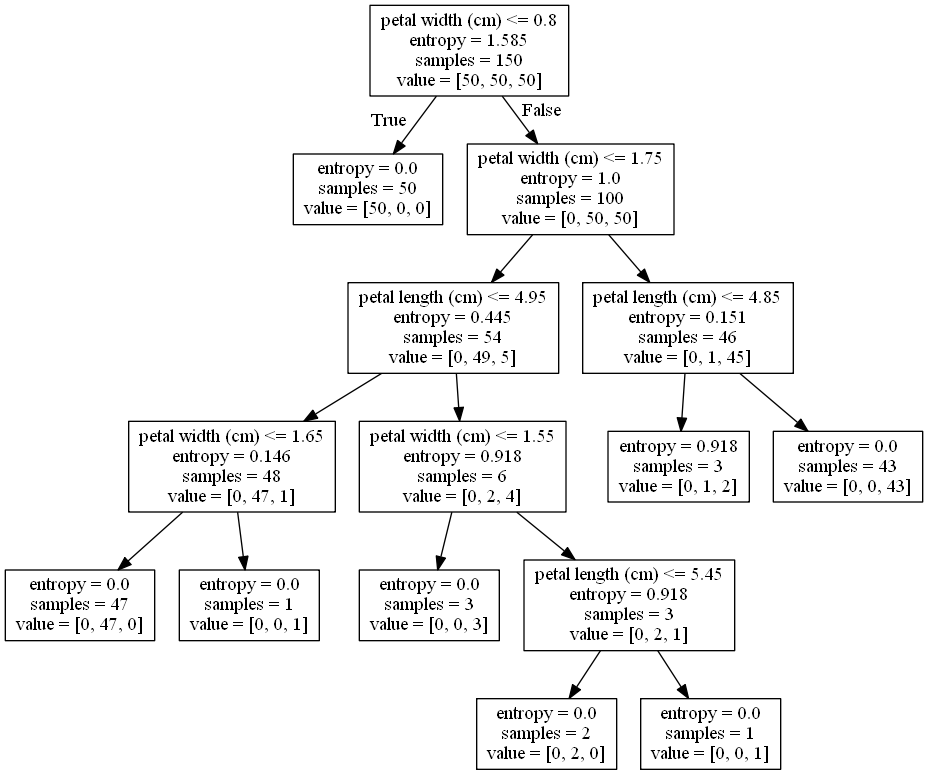

In [24]:
draw_decision_tree(tree5)

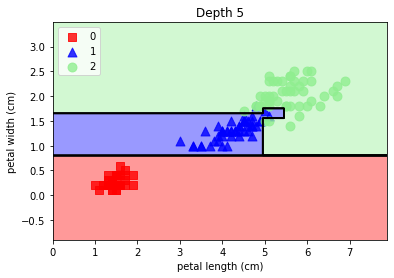

In [28]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [33]:
confusion_matrix(y, tree5.predict(X))
# 트리는 깊어질 수록 정확해지지만 일정 수준이 넘어가면 큰 의미가 없을 수 있음

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

### Titanic Survivors

In [34]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [36]:
from sklearn.preprocessing import LabelEncoder
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX.tail() 

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [37]:
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
# 나이가 없는 경우 평균값을 넣어줌
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [38]:
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)


model = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=[
                'Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()


FileNotFoundError: [Errno 2] "dot" not found in path.

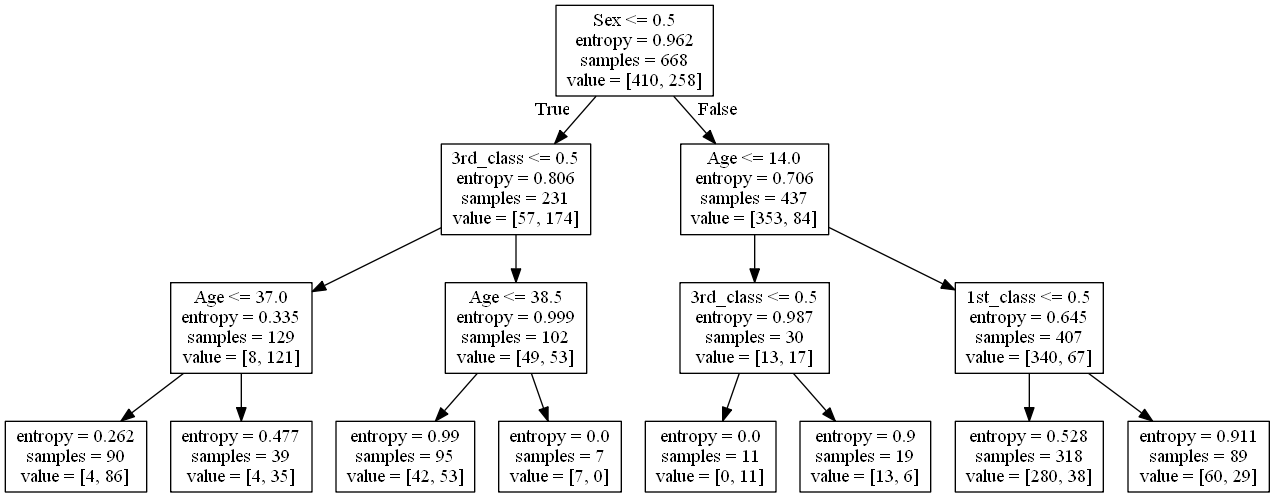

In [33]:
Image(image)

In [34]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]], dtype=int64)

In [35]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668



In [37]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       139
           1       0.75      0.70      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



### Greedy 의사 결정

의사결정나무의 문제점 중 하나는 특징의 선택이 greedy한 방식으로 이루어지기 때문에 선택된 특징이 최적의 선택이 아닐 수도 있음.

In [38]:
X = [
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
    [0, 1, 1],
    [1, 1, 1],
]
y = [0,0,1,1,1,1,0,0]

첫 노드에서는 $x_1, x_2, x_3$의  성능이 같습니다. 만약 첫 노드에서 특징으로 $x_1$을 선택하면 2단계로 완벽한 분류를 하는 것이 불가능함. 그런데 첫 특징으로 $x_1$이 아니라 $x_3$를 선택하면 2번째 단계에서 $x_2$를 선택함으로써 2단계만에 완벽한 분류를 할 수 있음. 하지만 이후의 상황을 첫 노드에서 특징을 결정할 때는 알 수 없음.

In [40]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2).fit(X, y)
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, 
                feature_names=["X1", "X2", "X3"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

ValueError: Length of feature_names, 3 does not match number of features, 2

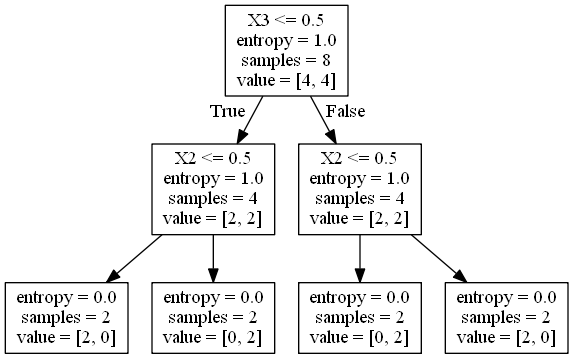

In [40]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=3).fit(X, y)
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, 
                feature_names=["X1", "X2", "X3"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

### Regression tree

예측값 $\hat{y}$을 다음처럼 각 특징값 영역마다 고정된 값 $y_1, y_2$를 사용하고,

$$ 
\hat{y} = 
\begin{cases} 
y_1 & \text{ if } x \geq x_{\text{threshold}} \\ 
y_2 & \text{ if } x < x_{\text{threshold}}
\end{cases} $$

기준값 및 $y_1, y_2$를 선택하는 목적함수로 오차 제곱합을 사용하면 회귀분석를 할 수 있습니다. 이러한 모형을 회귀 나무(regression tree)라고 한다.

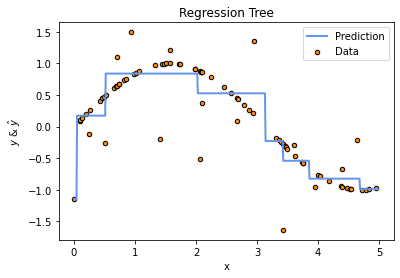

In [41]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regtree.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="Prediction")
plt.xlabel("x")
plt.ylabel(r"$y$ & $\hat{y}$")
plt.title("Regression Tree")
plt.legend()
plt.show()

# Today
- (정보)엔트로피
- 의사결정나무

# Next class
- 분산처리 개론
- Dask
- Hadoop? Spark?
- 효율적인 분산처리란?

# Reference
- https://datascienceschool.net/